# Includes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [44]:
title_size = 24
axislabel_size = 24
axistick_size = 20
legendlabel_size = 16

# Surface area-to-volume plot

### Constants

In [56]:
pi = 3.14159
um = 1e-6            # micrometer
nm = 1e-9            # nanometer

lam = 1*nm           # Debye length

### Calculate

In [57]:
rs = [1*nm, 3*nm, 10*nm, 30*nm, 100*nm, 300*nm, 1000*nm, 3000*nm]
ratios = [(r**2-(r-lam)**2)/(r**2) for r in rs]

### Plot

/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


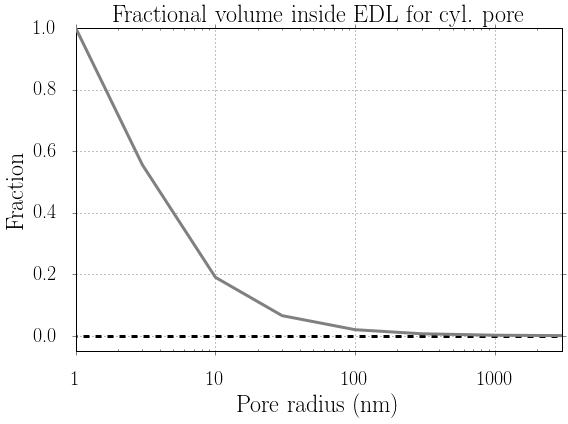

In [60]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(rs, ratios, lw = 3, c = 'gray', zorder = 3)
plt.semilogx([.1*nm,1], [0,0], lw = 3, c = 'black', ls = '--', zorder = 2)

plt.xlim(min(rs), max(rs))
plt.ylim(-0.05, 1.0)


plt.title('Fractional volume inside EDL for cyl. pore', size = title_size)
plt.xlabel('Pore radius (nm)', size = axislabel_size)
plt.ylabel('Fraction', size = axislabel_size)

ax = plt.gca()
ax.set_xticklabels(['', '1', '10', '100', '1000'])
ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.grid()

plt.savefig('fractional_volume.png', dpi = 300)

plt.show()